In [382]:
import sys

sys.path.append("...")

import Essentials
import Visualizer_pred

In [373]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd

In [374]:
data_archive = np.load('Data_First_Nikita.npz', allow_pickle=True)

In [375]:
def prepare_Y(y):
    timestamp = y[:, 1]
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

ALL_column_names_1 = data_archive['column_names_1']
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

ALL_column_names_2 = data_archive['column_names_2_cat']
all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

ALL_column_names_3 = data_archive['column_names_3_cat']
all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

column_names_2 = data_archive['column_names_2']
x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

column_names_3 = data_archive['column_names_3']
x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']

df_X1 = pd.read_csv(r'raw_X1.csv', index_col=0)
df_X2 = pd.read_csv(r'raw_X2.csv', index_col=0)
df_X3 = pd.read_csv(r'raw_X3.csv', index_col=0)
df_Y1 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y2 = pd.read_csv(r'raw_Y1.csv', index_col=0)
df_Y3 = pd.read_csv(r'raw_Y1.csv', index_col=0)

x_train, x_test, y_train, y_test=train_test_split(all_X_2, all_Y_2, test_size=0.2, random_state=42)

y_train, timestamp_train = prepare_Y(y_train)
sorted_indices_train = np.argsort(timestamp_train)
y_train = y_train[sorted_indices_train]
timestamp_train = timestamp_train[sorted_indices_train]
x_train = x_train[sorted_indices_train]

y_test, timestamp_test = prepare_Y(y_test)

x_test1, x_val, y_test1, y_val, timestamp_test1, timestamp_val = train_test_split(
    x_test, y_test, timestamp_test, test_size=0.5, random_state=42
)

sorted_indices_test = np.argsort(timestamp_test)
y_test = y_test[sorted_indices_test]
timestamp_test = timestamp_test[sorted_indices_test]
x_test = x_test[sorted_indices_test]

print(all_X_1.shape)
print(all_Y_1.shape)
print(x_train.shape)
print(y_test.shape)

x_train_winter, x_test_winter, y_train_winter, y_test_winter = train_test_split(x_winter_half_3, y_winter_half_3, test_size=0.2, random_state=42)
x_train_summer, x_test_summer, y_train_summer, y_test_summer = train_test_split(x_summer_half_3, y_summer_half_3, test_size=0.2, random_state=42)

y_train_summer, timestamp_train_summer = prepare_Y(y_train_summer)
sorted_indices_train_summer = np.argsort(timestamp_train_summer)
y_train_summer = y_train_summer[sorted_indices_train_summer]
timestamp_train_summer = timestamp_train_summer[sorted_indices_train_summer]
x_train_summer = x_train_summer[sorted_indices_train_summer]

y_train_winter, timestamp_train_winter = prepare_Y(y_train_winter)
sorted_indices_train_winter = np.argsort(timestamp_train_winter)
y_train_winter = y_train_winter[sorted_indices_train_winter]
timestamp_train_winter = timestamp_train_winter[sorted_indices_train_winter]
x_train_winter = x_train_winter[sorted_indices_train_winter]

y_test_summer, timestamp_test_summer = prepare_Y(y_test_summer)
sorted_indices_test_summer = np.argsort(timestamp_test_summer)
y_test_summer = y_test_summer[sorted_indices_test_summer]
timestamp_test_summer = timestamp_test_summer[sorted_indices_test_summer]
x_test_summer = x_test_summer[sorted_indices_test_summer]

y_test_winter, timestamp_test_winter = prepare_Y(y_test_winter)
sorted_indices_test_winter = np.argsort(timestamp_test_winter)
y_test_winter = y_test_winter[sorted_indices_test_winter]
timestamp_test_winter = timestamp_test_winter[sorted_indices_test_winter]
x_test_winter = x_test_winter[sorted_indices_test_winter]

column_names_X1 = df_X1.columns.tolist()
column_names_X2 = df_X2.columns.tolist()
column_names_X3 = df_X3.columns.tolist()
column_name_Y1 = 'Давление насыщенных паров в зимний период'
column_name_Y2 = 'Конец кипения легкого бензина'
column_name_Y3 = 'Содержание олефинов в продукте'

column_names_X1.pop()
column_names_X2.pop()
column_names_X3.pop()

feature_names_1 = column_names_X1
feature_names_2 = column_names_X2
feature_names_3 = column_names_X3

target_name_1 = column_name_Y1
target_name_2 = column_name_Y2
target_name_3 = column_name_Y3

(107, 87)
(107, 2)
(84, 43)
(21, 1)


In [376]:
class kNN(Essentials.SoftSensor):
    def __init__(self, x_train, y_train, **kwargs):
        super().__init__('Test')
        self.parameters = kwargs
        self.model = KNeighborsRegressor(**self.parameters)
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)

    def preprocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
    def postprocessing(self, x):
        return x
                
    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions.reshape(-1, 1)

    def train(self, x_train, y_train):
        x_train = self.preprocessing(x_train)
        self.model.fit(x_train, y_train)
        self.set_model(self.model)
        
    def __str__(self):
        pass
    def predict(self, x):
        return self.evaluate_model(self.preprocessing(x))

In [377]:
test_soft_sensor = kNN(x_train, y_train, n_neighbors=3, weights='distance', algorithm = 'ball_tree', metric = 'minkowski', p = 2)

In [378]:
metric = Essentials.R2Metric()

In [379]:
test_soft_sensor.test(x_test, y_test, metric)

(array([[ 81.98378456],
        [ 79.2524241 ],
        [ 80.85733195],
        [ 87.93312928],
        [ 86.14013777],
        [ 99.27176741],
        [ 98.79129941],
        [103.35420666],
        [113.7670341 ],
        [ 92.03293147],
        [ 81.15494176],
        [ 87.48180302],
        [ 85.54026364],
        [ 85.27892872],
        [ 83.8615588 ],
        [ 92.47496069],
        [ 93.66517087],
        [ 81.15328392],
        [ 82.46113362],
        [ 86.82836438],
        [ 85.51603869]]),
 0.5025934727945198)

In [380]:
test_visual = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'kNN SoftSensor R2 metric on Test')

      Coefficient of determination
Test                      0.502593


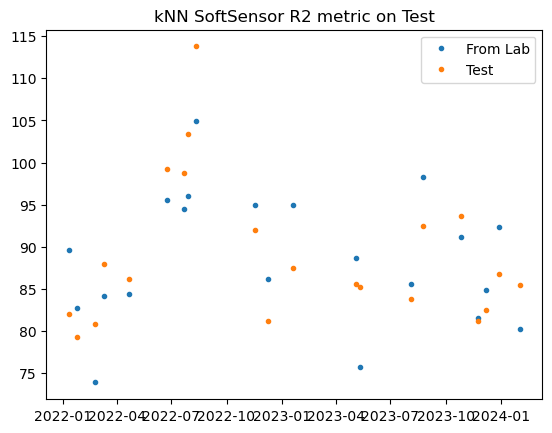

In [381]:
test_visual.visualize([test_soft_sensor])

In [383]:
test_visual=Visualizer_pred.Visualizer(x_test, y_test, timestamp_test,[metric], 'Test kNN Sensor R2 metric')

+------+--------------------------------+--------+
|      |   Coefficient of determination |    MSE |
+======+================================+========+
| Test |                       0.502593 | 28.489 |
+------+--------------------------------+--------+


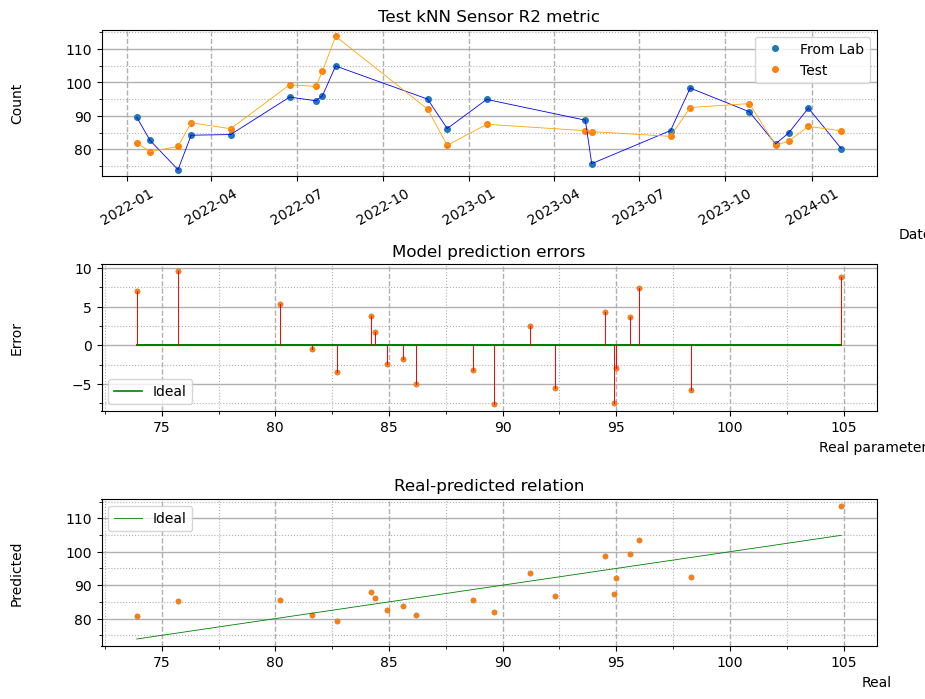

In [384]:
test_visual.visualize([test_soft_sensor], lines=True, lines_vertical=True)